In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
import os
from dython.nominal import associations

In [2]:
root = path.abspath(os.getcwd())
dataset_root = path.join(root, 'dataset')

In [3]:
df = pd.read_csv(path.join(dataset_root, 'csv/data.csv'), encoding = 'utf8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.shape

(319795, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df["HeartDisease"].value_counts(normalize = True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [11]:
df["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

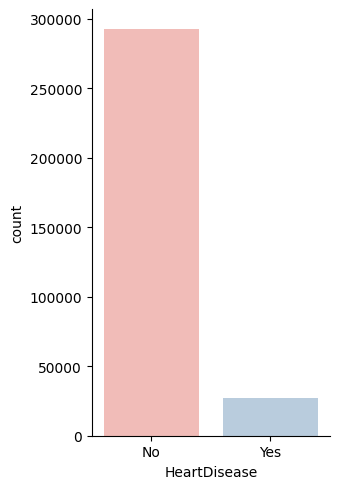

In [22]:
sns.set_palette('Pastel1')
g = sns.catplot(x="HeartDisease",
                data=df, kind="count",
                height=5, aspect=0.7);

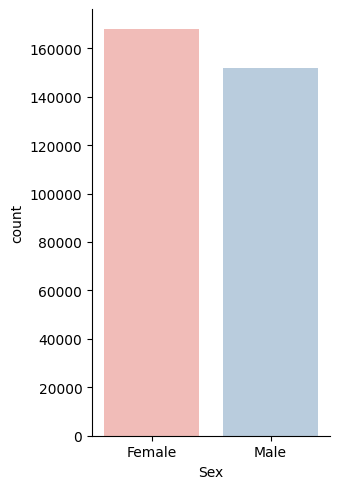

In [25]:
g = sns.catplot(x="Sex",
                data=df, kind="count",
                height=5, aspect=0.7);

In [26]:
df.groupby("Sex")["HeartDisease"].value_counts(normalize = True)

Sex     HeartDisease
Female  No              0.933053
        Yes             0.066947
Male    No              0.893815
        Yes             0.106185
Name: HeartDisease, dtype: float64

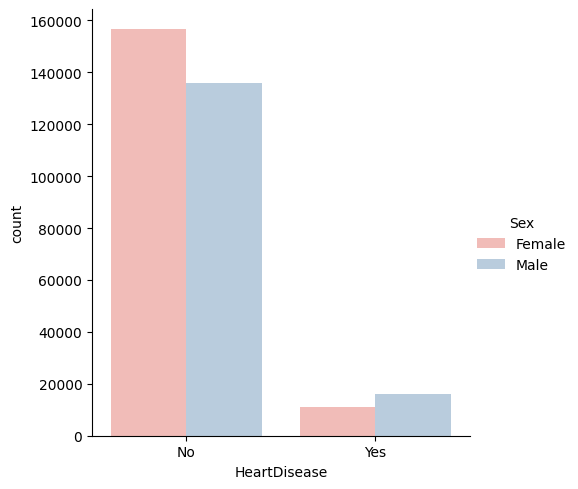

In [23]:
g = sns.catplot(x="HeartDisease", hue="Sex",
                data=df, kind="count",
                height=5, aspect=1);

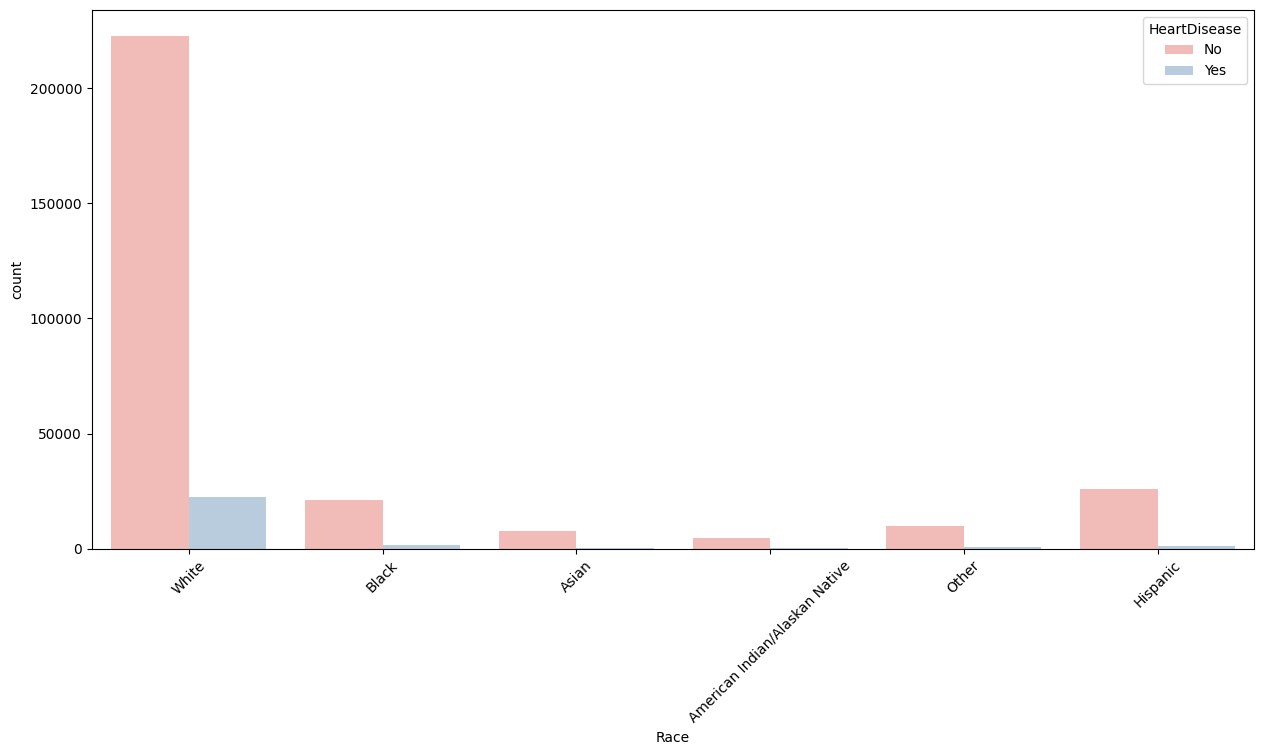

In [83]:
plt.figure(figsize=(15,7))
g = sns.countplot(x="Race", hue='HeartDisease', data=df)
rotation = plt.xticks(rotation=45)


In [45]:
df[(df["Race"] == 'White')].shape

(245212, 18)

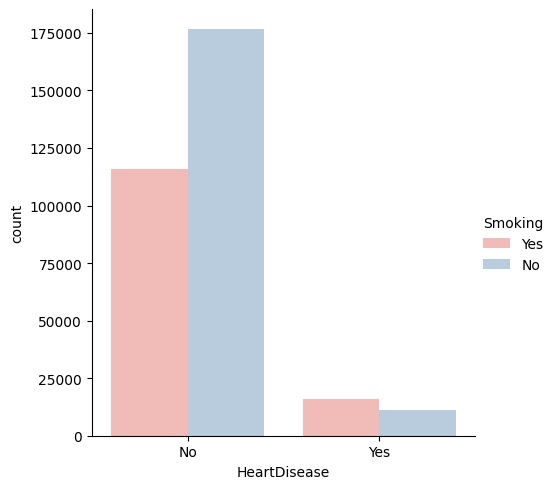

In [37]:
g = sns.catplot(x="HeartDisease", hue="Smoking",
                data=df, kind="count",
                height=5, aspect=1);

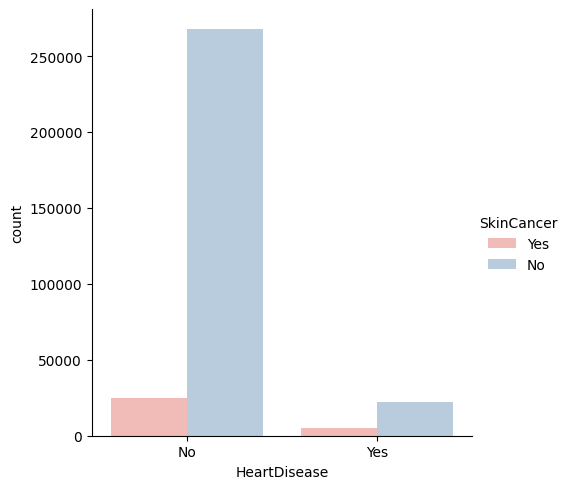

In [38]:
g = sns.catplot(x="HeartDisease", hue="SkinCancer",
                data=df, kind="count",
                height=5, aspect=1.0);

<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

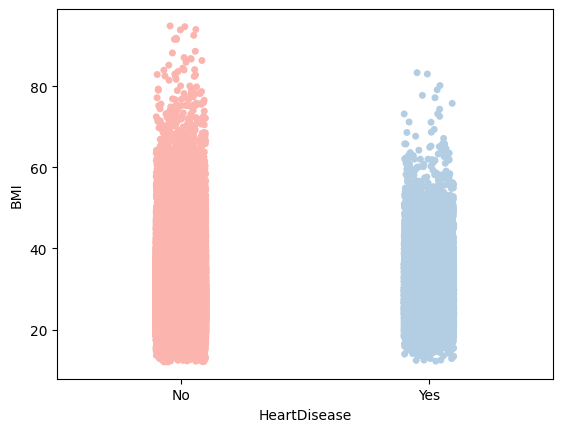

In [41]:
sns.stripplot(data=df, x='HeartDisease', y='BMI')

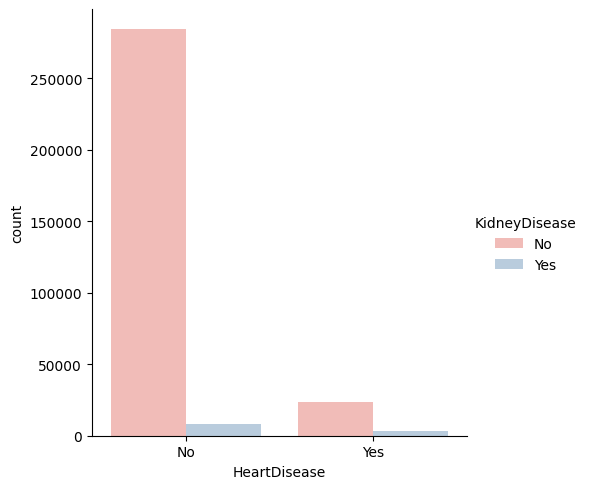

In [46]:
g = sns.catplot(x="HeartDisease", hue="KidneyDisease",
                data=df, kind="count",
                height=5, aspect=1.0);

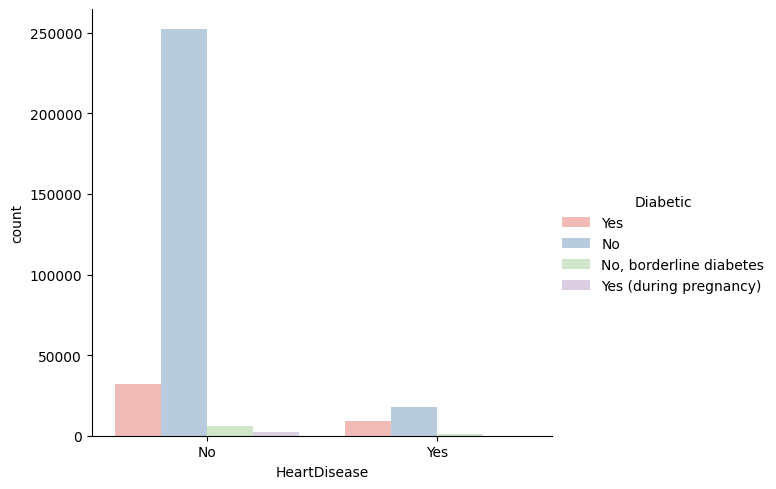

In [47]:
g = sns.catplot(x="HeartDisease", hue="Diabetic",
            data=df, kind="count",
            height=5, aspect=1.2);

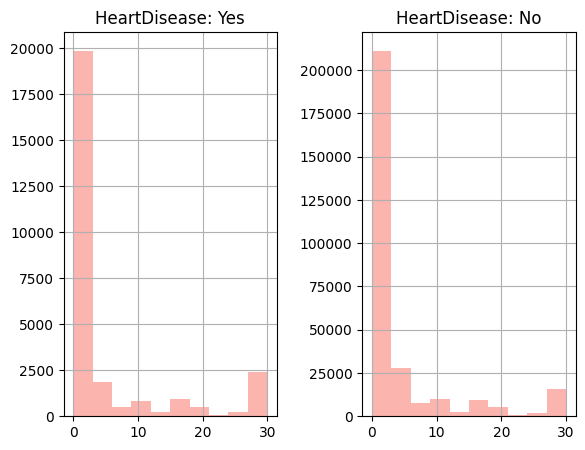

In [73]:
fig, ax =plt.subplots(1,2)
df[df["HeartDisease"] == "Yes"]["MentalHealth"].hist(ax=ax[0])
ax[0].set_title('HeartDisease: Yes')
df[df["HeartDisease"] == "No"]["MentalHealth"].hist(ax=ax[1])
ax[1].set_title('HeartDisease: No')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


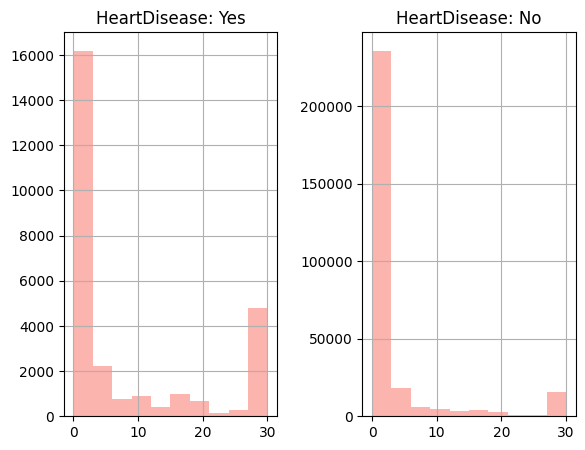

In [66]:
fig, ax =plt.subplots(1,2)
df[df["HeartDisease"] == "Yes"]["PhysicalHealth"].hist(ax=ax[0])
ax[0].set_title('HeartDisease: Yes')
df[df["HeartDisease"] == "No"]["PhysicalHealth"].hist(ax=ax[1])
ax[1].set_title('HeartDisease: No')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

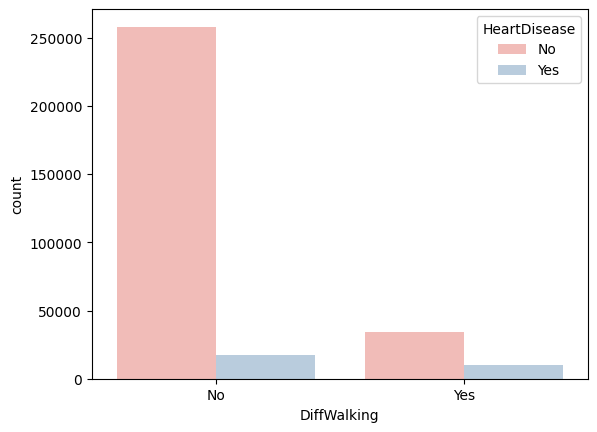

In [77]:
sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')

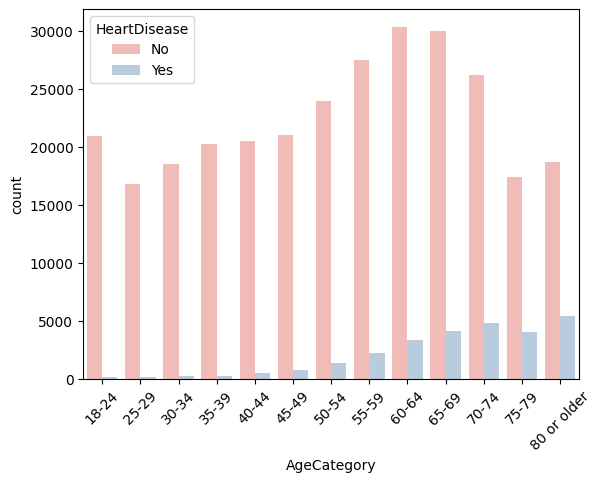

In [84]:
order = ['18-24', '25-29', '30-34', '35-39', '40-44',
      '45-49', '50-54', '55-59', '60-64', '65-69',
      '70-74', '75-79', '80 or older']
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', order=order )
rotation = plt.xticks(rotation=45)



<AxesSubplot:xlabel='SleepTime', ylabel='count'>

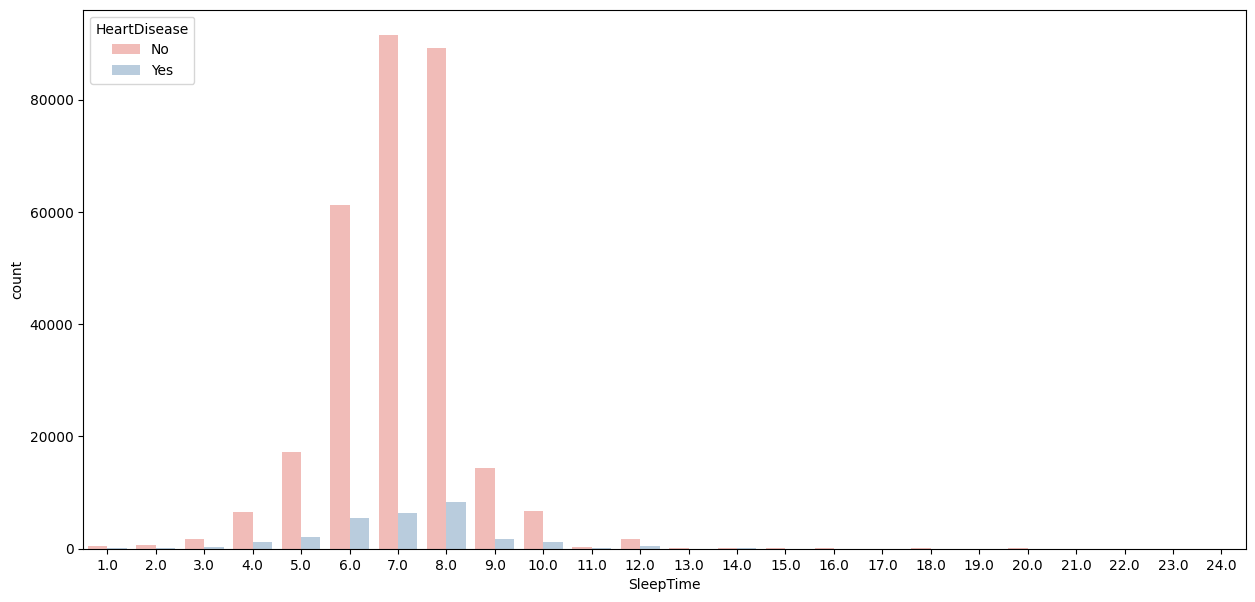

In [93]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='SleepTime', hue='HeartDisease')


<AxesSubplot:xlabel='GenHealth', ylabel='count'>

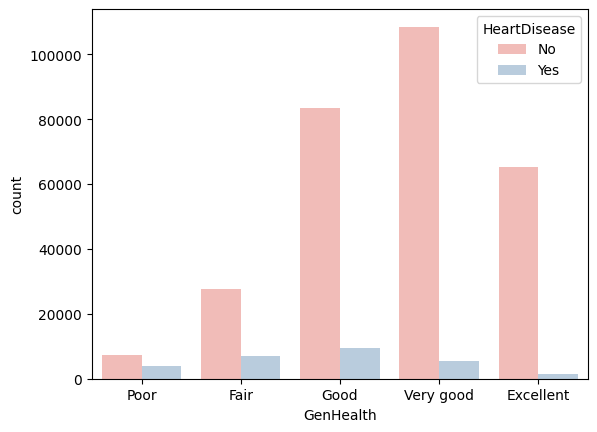

In [90]:
order = ['Poor', 'Fair' ,'Good', 'Very good','Excellent']
sns.countplot(data=df, x='GenHealth', hue='HeartDisease', order=order)


<AxesSubplot:>

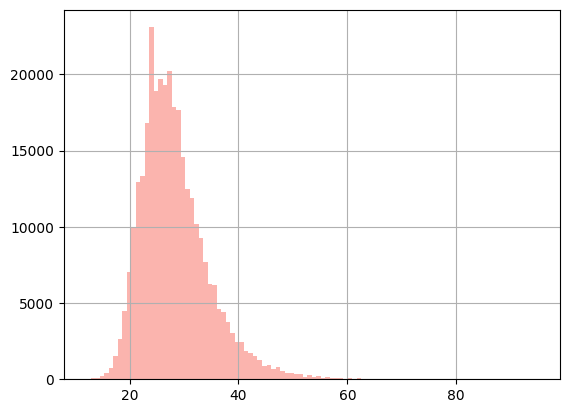

In [99]:
df['BMI'].hist(bins=100)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

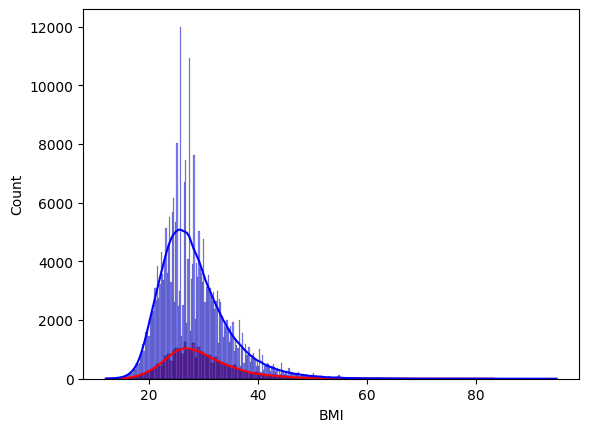

In [106]:
sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue')


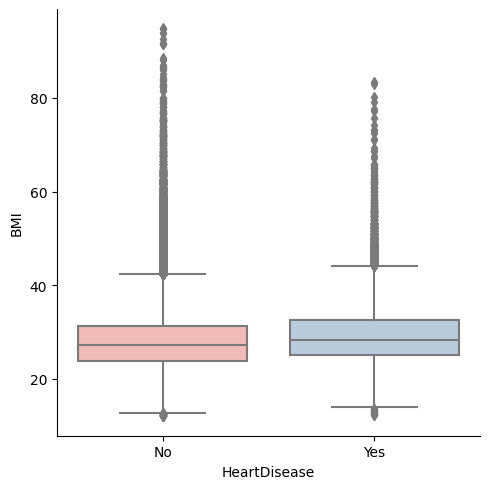

In [75]:
sns.catplot(data=df, x='HeartDisease', y='BMI', kind='box')


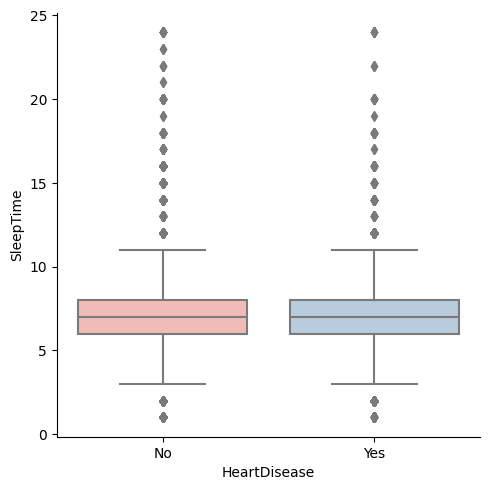

In [78]:
sns.catplot(data=df, x='HeartDisease', y='SleepTime', kind='box')


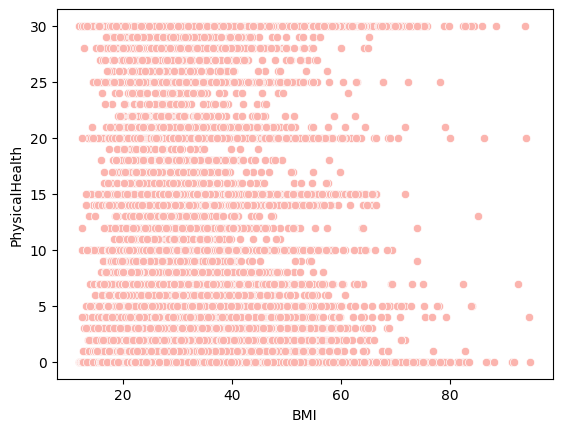

In [94]:
sns.scatterplot(x = "BMI", y = "PhysicalHealth", data = df);

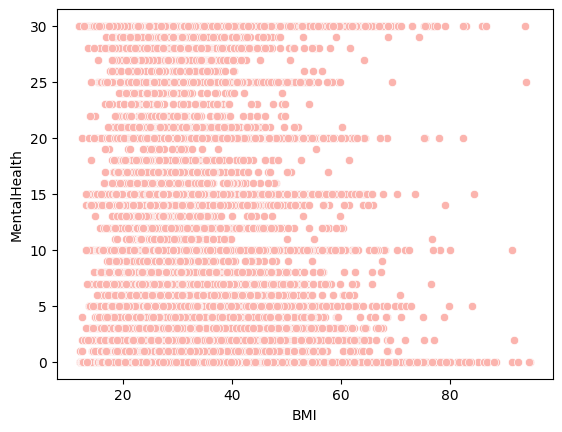

In [95]:
sns.scatterplot(x = "BMI", y = "MentalHealth", data = df);

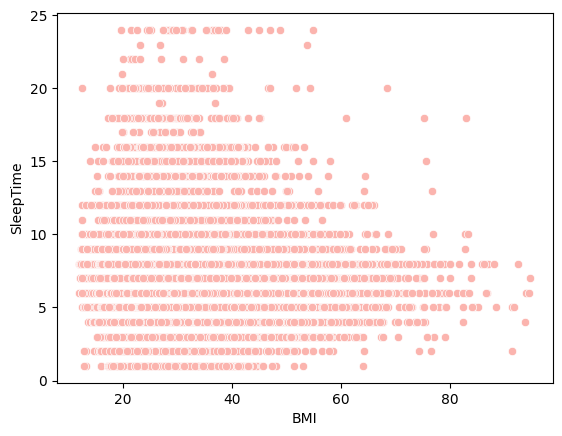

In [96]:
sns.scatterplot(x = "BMI", y = "SleepTime", data = df);

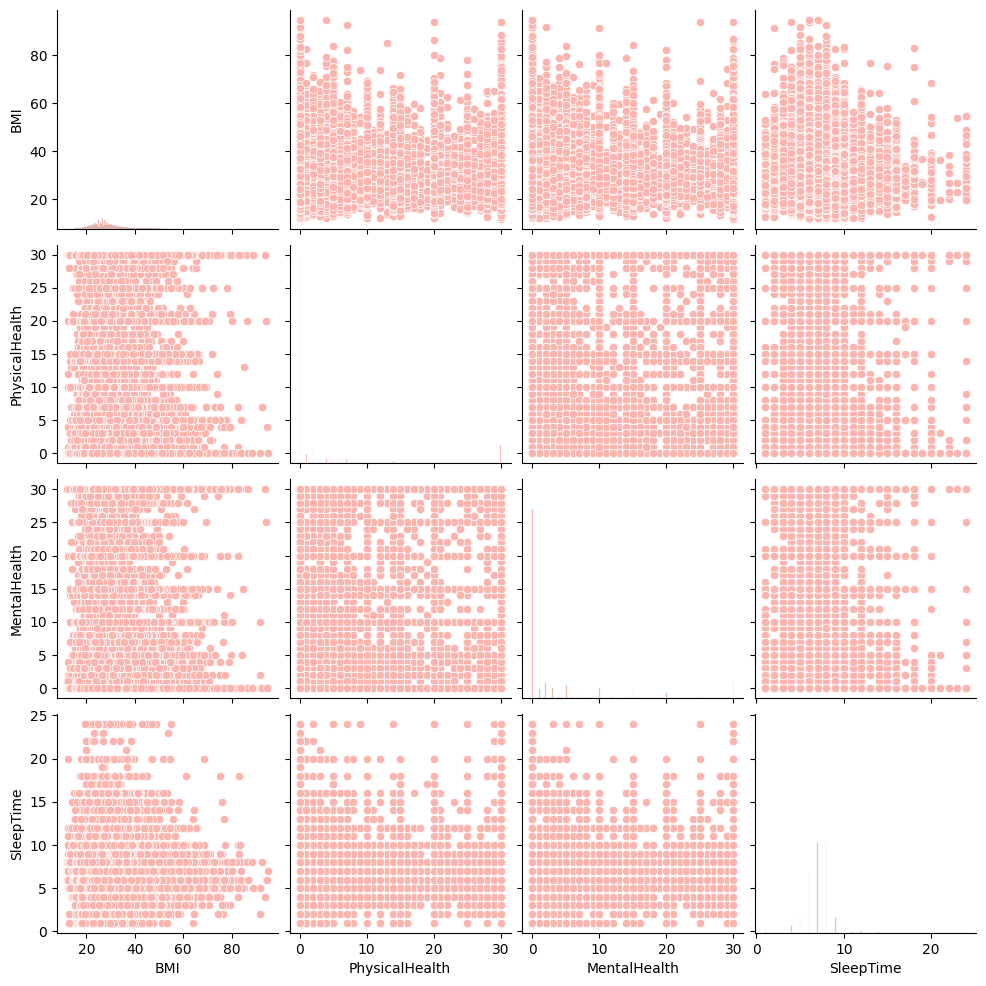

In [100]:
sns.pairplot(df);

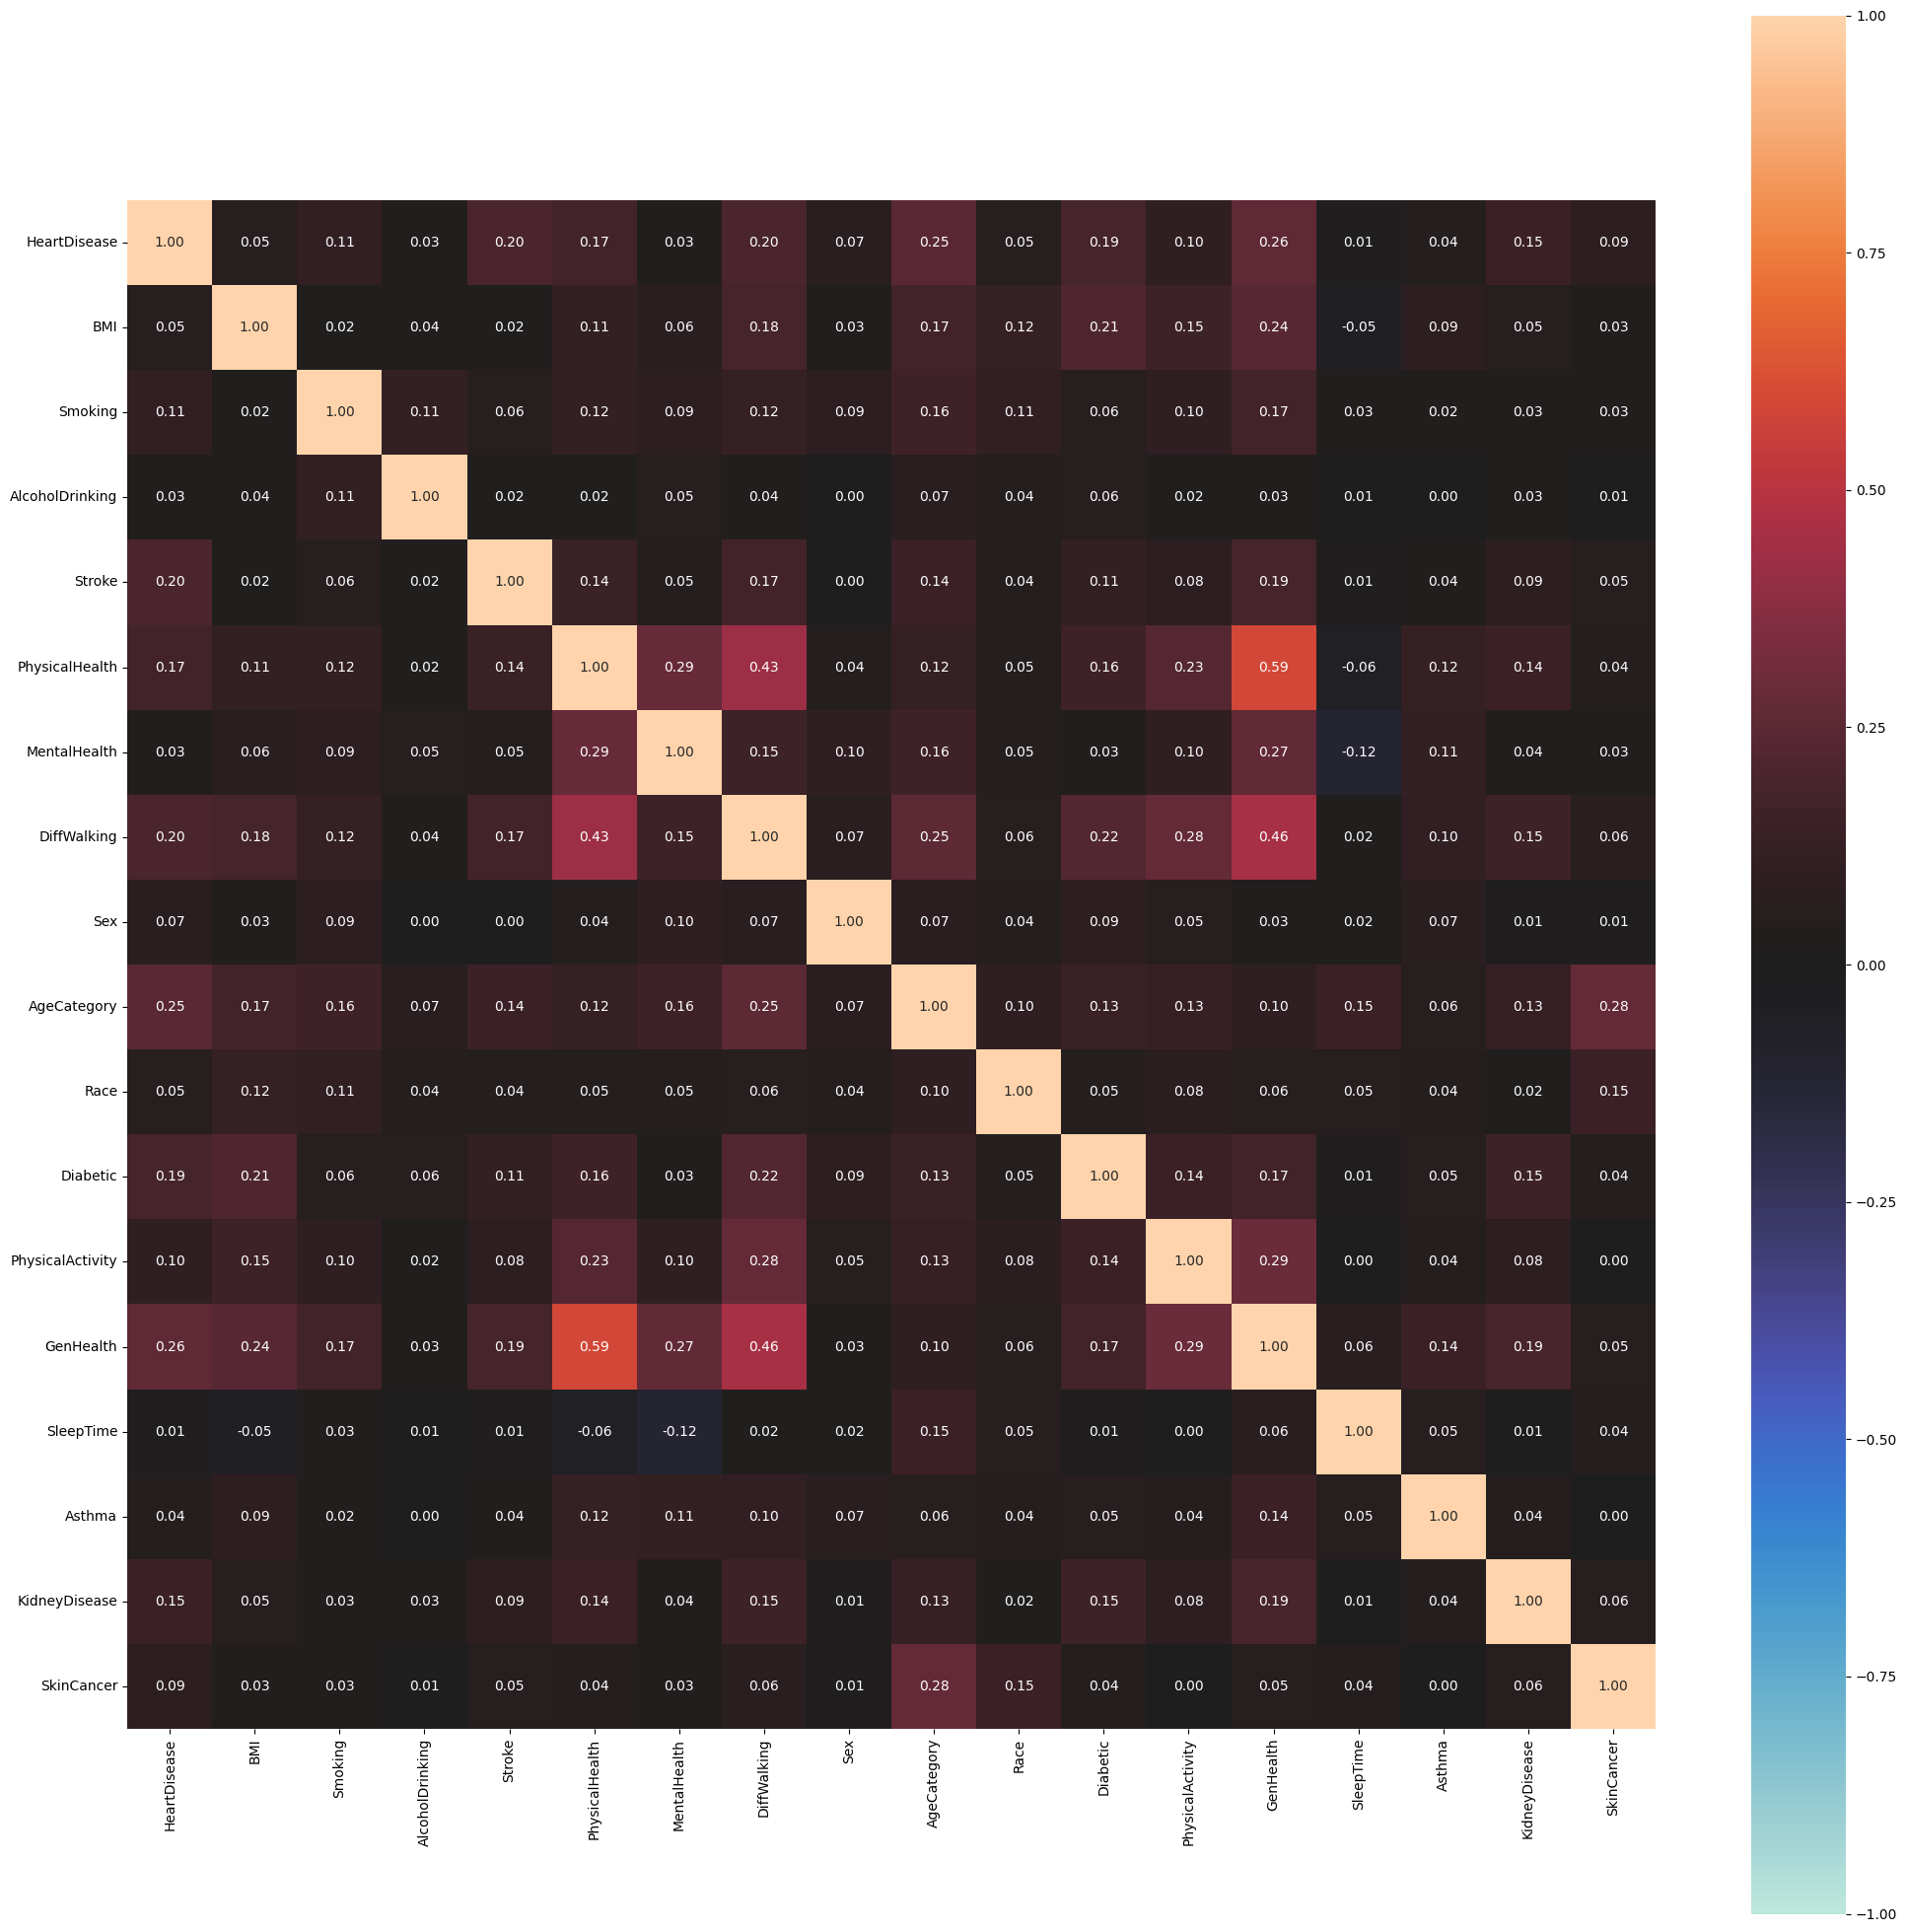

In [101]:
from dython.nominal import associations
corr = associations(df, figsize=(25,25))